In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

class Layer:
    """
    Represents a layer (hidden or output) in our neural network.
    """

    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        """
        :param int n_input: The input size (coming from the input layer or a previous hidden layer)
        :param int n_neurons: The number of neurons in this layer.
        :param str activation: The activation function to use (if any).
        :param weights: The layer's weights.
        :param bias: The layer's bias.
        """

        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        """
        Calculates the dot product of this layer.
        :param x: The input.
        :return: The result.
        """

        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        """
        Applies the chosen activation function (if any).
        :param r: The normal value.
        :return: The "activated" value.
        """

        # In case no activation function was chosen
        if self.activation is None:
            return r

        # tanh
        if self.activation == 'tanh':
            return np.tanh(r)

        # sigmoid
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))

        return r

    def apply_activation_derivative(self, r):
        """
        Applies the derivative of the activation function (if any).
        :param r: The normal value.
        :return: The "derived" value.
        """

        # We use 'r' directly here because its already activated, the only values that
        # are used in this function are the last activations that were saved.

        if self.activation is None:
            return r

        if self.activation == 'tanh':
            return 1 - r ** 2

        if self.activation == 'sigmoid':
            return r * (1 - r)

        return r


class NeuralNetwork:
    """
    Represents a neural network.
    """

    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        """
        Adds a layer to the neural network.
        :param Layer layer: The layer to add.
        """

        self._layers.append(layer)

    def feed_forward(self, X):
        """
        Feed forward the input through the layers.
        :param X: The input values.
        :return: The result.
        """

        for layer in self._layers:
            X = layer.activate(X)

        return X

    def predict(self, X):
        """
        Predicts a class (or classes).
        :param X: The input values.
        :return: The predictions.
        """

        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)
        """
    def backpropagation(self, X, y, learning_rate):
        """
        Performs the backward propagation algorithm and updates the layers weights.
        :param X: The input values.
        :param y: The target values.
        :param float learning_rate: The learning rate (between 0 and 1).
        """

        # Feed forward for the output
        output = self.feed_forward(X)

        # Loop over the layers backward
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]

            # If this is the output layer
            if layer == self._layers[-1]:
                layer.error = y - output
                # The output = layer.last_activation in this case
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # Update the weights
        for i in range(len(self._layers)):
            layer = self._layers[i]
            # The input is either the previous layers output or X itself (for the first hidden layer)
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        """
        Trains the neural network using backpropagation.
        :param X: The input values.
        :param y: The target values.
        :param float learning_rate: The learning rate (between 0 and 1).
        :param int max_epochs: The maximum number of epochs (cycles).
        :return: The list of calculated MSE errors.
        """

        mses = []
        for i in range(max_epochs):
            temp_mses = []
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                temp_mses.append(mse)
            mses.append(sum(temp_mses) / len(temp_mses))
            print('Epoch: #%s, MSE: %f' % (i+1, float(mse)))
        return mses

    @staticmethod
    def accuracy(y_pred, y_true):
        """
        Calculates the accuracy between the predicted labels and true labels.
        :param y_pred: The predicted labels.
        :param y_true: The true labels.
        :return: The calculated accuracy.
        """

        return ((np.round(y_pred,1)== y_true)).mean()

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

Epoch: #1, MSE: 0.278002
Epoch: #2, MSE: 0.242796
Epoch: #3, MSE: 0.209606
Epoch: #4, MSE: 0.172917
Epoch: #5, MSE: 0.138358
Epoch: #6, MSE: 0.115121
Epoch: #7, MSE: 0.100658
Epoch: #8, MSE: 0.089797
Epoch: #9, MSE: 0.081016
Epoch: #10, MSE: 0.073872
Epoch: #11, MSE: 0.067948
Epoch: #12, MSE: 0.062908
Epoch: #13, MSE: 0.058524
Epoch: #14, MSE: 0.054647
Epoch: #15, MSE: 0.051183
Epoch: #16, MSE: 0.048064
Epoch: #17, MSE: 0.045242
Epoch: #18, MSE: 0.042678
Epoch: #19, MSE: 0.040341
Epoch: #20, MSE: 0.038206
Epoch: #21, MSE: 0.036249
Epoch: #22, MSE: 0.034452
Epoch: #23, MSE: 0.032798
Epoch: #24, MSE: 0.031272
Epoch: #25, MSE: 0.029860
Epoch: #26, MSE: 0.028553
Epoch: #27, MSE: 0.027339
Epoch: #28, MSE: 0.026210
Epoch: #29, MSE: 0.025158
Epoch: #30, MSE: 0.024176
Epoch: #31, MSE: 0.023257
Epoch: #32, MSE: 0.022397
Epoch: #33, MSE: 0.021590
Epoch: #34, MSE: 0.020832
Epoch: #35, MSE: 0.020118
Epoch: #36, MSE: 0.019446
Epoch: #37, MSE: 0.018812
Epoch: #38, MSE: 0.018213
Epoch: #39, MSE: 0.01

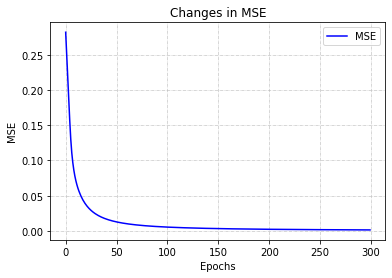

In [ ]:
nn = NeuralNetwork()
nn.add_layer(Layer(2, 10, 'tanh'))
nn.add_layer(Layer(10, 1, 'sigmoid'))

# Define dataset XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the neural network
errors = nn.train(X, y, 0.75, 300)
print("Accuracy: %.2f%%" % (nn.accuracy(nn.predict(X)[:,0].T, y.flatten()) * 100))
print("Data ouput: \n" + str(y))
print("Predicted output: \n" + str(nn.predict(X)))
print("Predicted output round: \n" + str(np.round(nn.predict(X),1)))

# Plot changes in mse
plt.plot(errors, c = 'b', label = 'MSE')
plt.title('Changes in MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
print("Predicted output train: \n" + str(nn.predict(X)))
test = [
    [2,0],
    [0,-1],
    [45,203],
    [-21,0],
    [0,85],
    [0,-328],
]
y_test = [[1], [0], [1], [0], [1], [0]]
pred = nn.predict(test)
print("Predicted output test: \n" + str(pred))
mse = np.mean(np.square(y_test - pred))
print(mse)

Predicted output train: 
[[0.04112823]
 [0.96121657]
 [0.96482312]
 [0.03660937]]
Predicted output test: 
[[0.89730846]
 [0.02266876]
 [0.82448414]
 [0.09977334]
 [0.82448414]
 [0.06686296]]
0.014516071855846392
